In [1]:
import pandas as pd 

In [2]:
ufo = pd.read_csv('http://bit.ly/uforeports')

In [3]:
ufo.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


In [7]:
#analyze by year or time of day
ufo.dtypes

City               object
Colors Reported    object
Shape Reported     object
State              object
Time               object
dtype: object

In [9]:
ufo.Time.str.slice(-5, -3).astype(int).head()

0    22
1    20
2    14
3    13
4    19
Name: Time, dtype: int64

In [11]:
#convert to datetime 
ufo['Time'] = pd.to_datetime(ufo.Time)

In [12]:
ufo.dtypes

City                       object
Colors Reported            object
Shape Reported             object
State                      object
Time               datetime64[ns]
dtype: object

In [14]:
#pandas figured it out automatically, but if it doesn't, there are many ways to make it work 
ufo.Time.dt.weekday_name
# if you are analyzing by day of the week. You can do day of year


0           Sunday
1           Monday
2           Sunday
3           Monday
4          Tuesday
5         Saturday
6         Saturday
7        Wednesday
8         Thursday
9          Tuesday
10          Sunday
11        Thursday
12          Friday
13          Friday
14          Sunday
15       Wednesday
16       Wednesday
17          Monday
18       Wednesday
19          Friday
20         Tuesday
21          Sunday
22          Sunday
23          Friday
24        Saturday
25        Saturday
26        Saturday
27          Sunday
28        Thursday
29          Friday
           ...    
18211     Thursday
18212     Thursday
18213     Thursday
18214       Friday
18215       Friday
18216       Friday
18217       Friday
18218       Friday
18219       Friday
18220       Friday
18221       Friday
18222       Friday
18223       Friday
18224       Friday
18225     Saturday
18226     Saturday
18227     Saturday
18228       Sunday
18229       Sunday
18230       Sunday
18231       Sunday
18232       

In [17]:
ufo.Time.dt.dayofyear.head()

0    152
1    181
2     46
3    152
4    108
Name: Time, dtype: int64

In [19]:
ts = pd.to_datetime('1/1/1999')

In [21]:
# you can compare timestamps as comparisons. Ufo.comparison if it is greater than the timestamp 
ufo.loc[ufo.Time >= ts].head()

,City,Colors Reported,Shape Reported,State,Time
12832,Loma Rica,NaN,LIGHT,CA,1999-01-01 02:30:00
12833,Bauxite,NaN,NaN,AR,1999-01-01 03:00:00
12834,Florence,NaN,CYLINDER,SC,1999-01-01 14:00:00
12835,Lake Henshaw,NaN,CIGAR,CA,1999-01-01 15:00:00
12836,Wilmington Island,NaN,LIGHT,GA,1999-01-01 17:15:00


In [25]:
# you can do mathematical things as well
(ufo.Time.max() - ufo.Time.min()).days
# difference between earliest and latest row is the time_delta object

25781

In [26]:
%matplotlib inline 

In [28]:
ufo['year'] = ufo.Time.dt.year

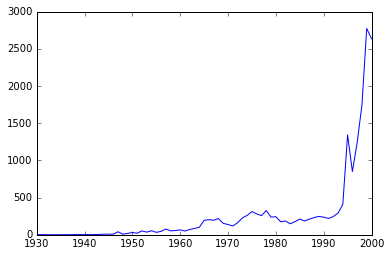

In [31]:
ufo.year.value_counts().sort_index().plot()

In [32]:
# kaggle = popular platform for competitive machine learning 
# semi automated extraction 

# how to use pandas with scikit learn 

train = pd.read_csv('http://bit.ly/kaggletrain')

In [33]:
#training data 
train.head()
#survived is 1 if the passenger survived 
# for the test set, predict survival based on other characteristics of the passenger 

#create feature matrix 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [34]:
feature_cols = ['Pclass', 'Parch']

In [35]:
X = train.loc[:, feature_cols]

In [37]:
X.shape

(891, 2)

In [38]:
y = train.Survived

In [40]:
y.shape

(891,)

In [41]:
from sklearn.linear_model import LogisticRegression

In [43]:
#classification model 
logreg = LogisticRegression()
logreg.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [44]:
test = pd.read_csv('http://bit.ly/kaggletest')

In [45]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [46]:
X_new = test.loc[:, feature_cols]

In [47]:
X_new.shape

(418, 2)

In [48]:
new_pred_class = logreg.predict(X_new)

In [50]:
test.PassengerId.head()

0    892
1    893
2    894
3    895
4    896
Name: PassengerId, dtype: int64

In [51]:
new_pred_class

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0,

In [58]:
pd.DataFrame({'PassengerId':test.PassengerId, 'Survived':new_pred_class})

TypeError: 'dict' object is not callable